# Importing libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier



In [144]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

# Visualizing data

In [153]:
data = pd.read_csv("mushr.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

No missing values. nice :)

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Target Class**

Text(0.5,1,'Count of each Class')

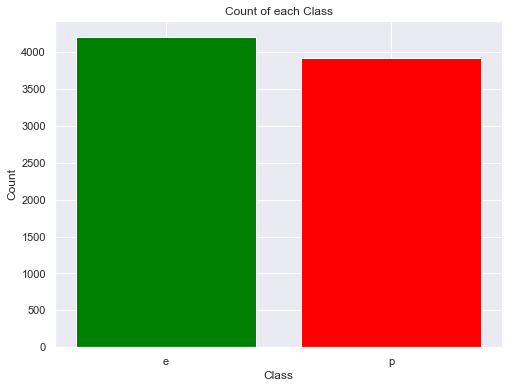

In [56]:
rcParams['figure.figsize'] = 8,6
plt.bar(['e','p'], data['class'].value_counts(), color = ['green', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of each Class')

# Preprocessing data

**Encoding data**

In [154]:
#Convert categorical variables into dummy variables
lb = LabelEncoder()
data['class'] = lb.fit_transform(data['class'])

data_encoded = data.copy()
data_encoded = pd.get_dummies(data_encoded,columns=list(data_encoded.drop(['class'],axis=1)),drop_first=True)

data_encoded.head()

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
#data_encoded=data_encoded.sample(frac=0.01, random_state=1)

**Creating train and test sets**

In [155]:
#Split into training and test sets
y = data_encoded['class']
X = data_encoded.drop(['class'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


# Machine Learning algorithms

**KNN Classifier**

Text(0.5,1,'K Neighbors Classifier scores for different K values')

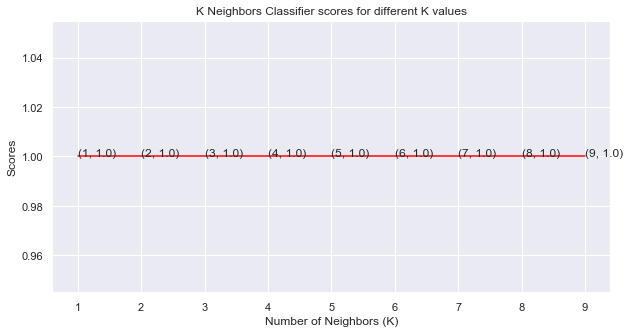

In [156]:
#KNN Classifier scores using all variables

knn_scores = []
for k in range(1,10):
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    #knn_clf.fit(X_train, y_train)
    knn_scores.append(round(np.mean(cross_val_score(knn_clf,X_train,y_train,cv=10)),2))

plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 10)], knn_scores, color = 'red')
for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


accuracy score is:  1.0
auc score is:  0.9999966191202275


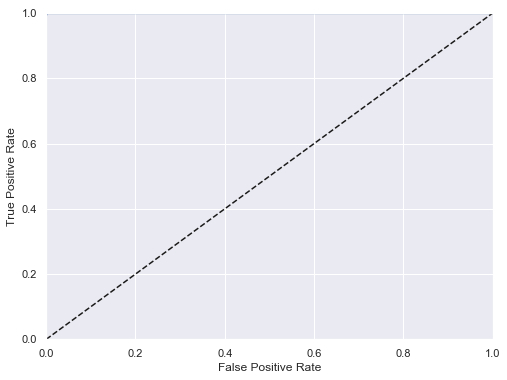

In [157]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print('accuracy score is: ', accuracy_score(y_test,y_pred)) #accuracy score


#AUC

test_scores = cross_val_predict(knn_clf, X_test, y_test,method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_test, test_scores[:,1])
print('auc score is: ',roc_auc_score(y_test, test_scores[:,1]))


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

**Logistic Regression**

Text(0.5,1,'Logistic Regression for different regularization values')

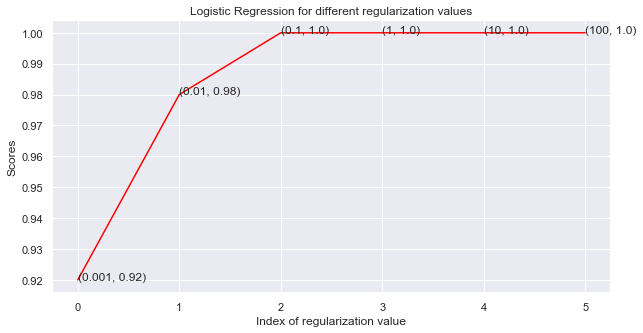

In [77]:
#Logistic Regression scores using all variables

C_param_range = [0.001,0.01,0.1,1,10,100]

log_scores = []
for i in C_param_range:
    log_reg = LogisticRegression(C = i)
    log_scores.append(round(np.mean(cross_val_score(log_reg,X_train,y_train,cv=10)),2))

plt.figure(figsize=(10,5))
plt.plot([C_param_range.index(i) for i in C_param_range], log_scores, color = 'red')
for i in C_param_range:
    plt.text(C_param_range.index(i), log_scores[C_param_range.index(i)], (i, log_scores[C_param_range.index(i)]))
plt.xticks([C_param_range.index(i) for i in C_param_range])
plt.xlabel('Index of regularization value')
plt.ylabel('Scores')
plt.title('Logistic Regression for different regularization values')

accuracy score is:  0.9995898277276456
auc score is:  0.9998397462987818


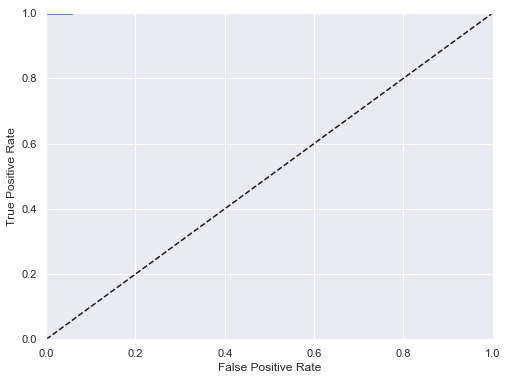

In [158]:
log_reg = LogisticRegression(C=1)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
#print_score(log_reg,X_train,y_train,X_test,y_test,train=False)
print('accuracy score is: ', accuracy_score(y_test,y_pred)) #accuracy score

#AUC

test_scores = cross_val_predict(log_reg, X_test, y_test, method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_test, test_scores[:,1])
print('auc score is: ',roc_auc_score(y_test, test_scores[:,1]))
plot_roc_curve(fpr, tpr)
plt.show()


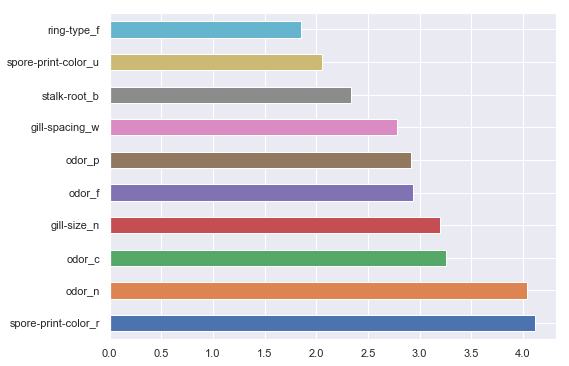

In [133]:
#features importance sorted by absolute value of coefficients
feat_importances = pd.Series(abs(log_reg.coef_[0]), index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Decision Tree Classifier**

Text(0.5,1,'Decision Tree Classifier scores for different number of maximum features')

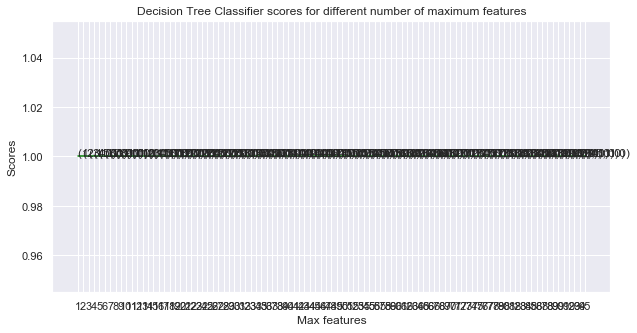

In [82]:
#Decision Tree scores using all variables

tree_scores = []
for i in range(1, len(X.columns) + 1):
    tree_clf = DecisionTreeClassifier(max_features = i, random_state = 0)
    tree_clf.fit(X_train, y_train)
    tree_scores.append(round(np.mean(cross_val_score(tree_clf,X_train,y_train,cv=10)),2))

plt.figure(figsize=(10,5))
plt.plot([i for i in range(1, len(X.columns) + 1)], tree_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, tree_scores[i-1], (i, tree_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

accuracy score is:  1.0
auc score is:  0.9983244105612011


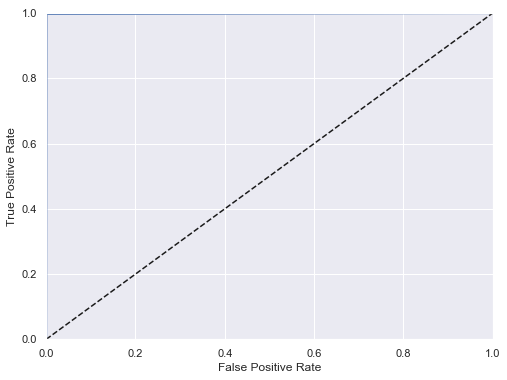

In [134]:
tree_clf = DecisionTreeClassifier(max_features = 10, random_state = 0)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

print('accuracy score is: ', accuracy_score(y_test,y_pred)) #accuracy score

#AUC
test_scores = cross_val_predict(tree_clf, X_test, y_test, method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_test, test_scores[:,1])
print('auc score is: ',roc_auc_score(y_test, test_scores[:,1]))
plot_roc_curve(fpr, tpr)
plt.show()


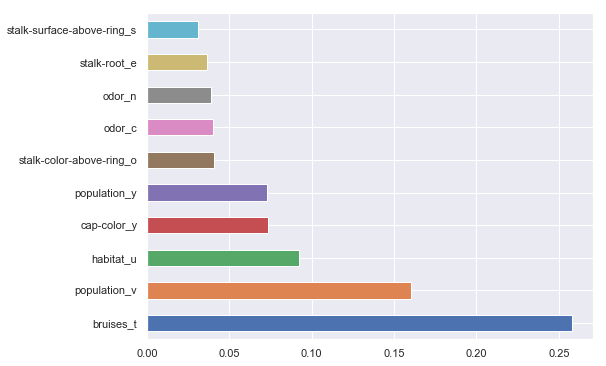

In [135]:
#feature importances
feat_importances = pd.Series(tree_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**SVM Classifier**

Text(0.5,1,'Support Vector Machines for different regularization values')

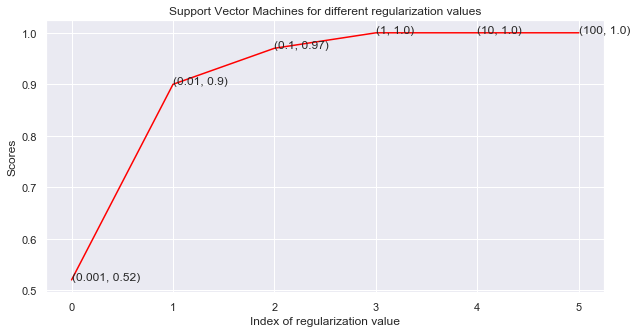

In [89]:
#SVM scores using all variables

C_param_range = [0.001,0.01,0.1,1,10,100]

svm_scores = []
for i in C_param_range:
    svm_clf = SVC(C = i)
    svm_scores.append(round(np.mean(cross_val_score(svm_clf,X_train,y_train,cv=10)),2))

plt.figure(figsize=(10,5))
plt.plot([C_param_range.index(i) for i in C_param_range], svm_scores, color = 'red')
for i in C_param_range:
    plt.text(C_param_range.index(i), svm_scores[C_param_range.index(i)], (i, svm_scores[C_param_range.index(i)]))
plt.xticks([C_param_range.index(i) for i in C_param_range])
plt.xlabel('Index of penalty parameter')
plt.ylabel('Scores')
plt.title('Support Vector Machines for different penalty parameters')

accuracy score is:  0.9954881050041017
auc score is:  0.9987685833046317


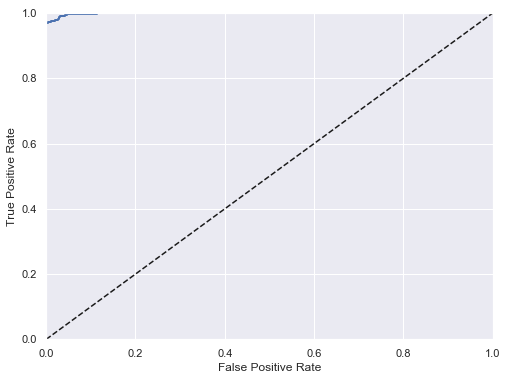

In [136]:
svm_clf = SVC(C=1,probability=True)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
#print_score(log_reg,X_train,y_train,X_test,y_test,train=False)
print('accuracy score is: ', accuracy_score(y_test,y_pred)) #accuracy score

#AUC
test_scores = cross_val_predict(svm_clf, X_test, y_test, method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_test, test_scores[:,1])
print('auc score is: ',roc_auc_score(y_test, test_scores[:,1]))
plot_roc_curve(fpr, tpr)
plt.show()


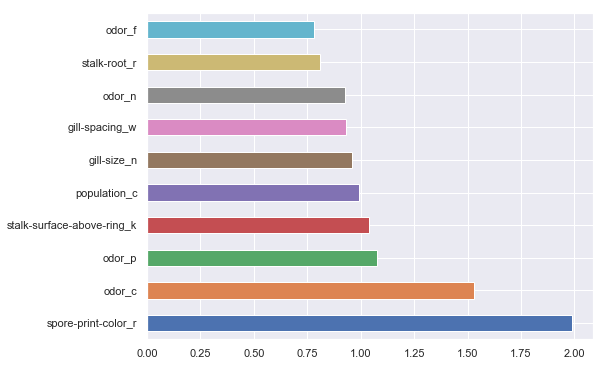

In [137]:
svm_clf = SVC(C=1,probability=True,kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

#feature importances
feat_importances = pd.Series(abs(svm_clf.coef_[0]), index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Random Forest Classifier**

Text(0.5,1,'Random Forest Classifier for different number of estimators')

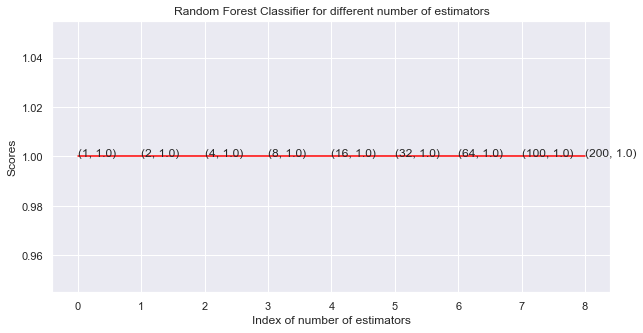

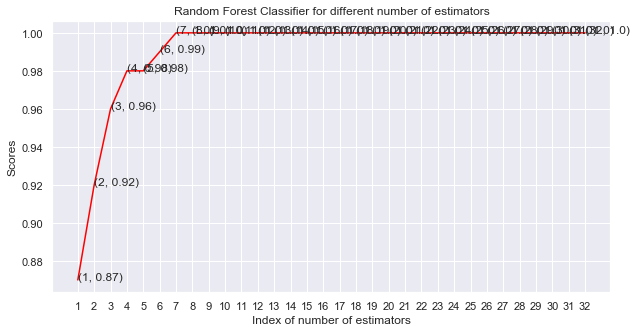

In [111]:
#Random Forest Classifier scores using all variables

n_est = [1, 2, 4, 8, 16, 32, 64, 100, 200]

rndf_scores = []
for i in n_est:
    rndf_clf = RandomForestClassifier(n_estimators = i)
    rndf_scores.append(round(np.mean(cross_val_score(rndf_clf,X_train,y_train,cv=10)),2))

plt.figure(figsize=(10,5))
plt.plot([n_est.index(i) for i in n_est], rndf_scores, color = 'red')
for i in n_est:
    plt.text(n_est.index(i), rndf_scores[n_est.index(i)], (i, rndf_scores[n_est.index(i)]))
plt.xticks([n_est.index(i) for i in n_est])
plt.xlabel('Index of number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier for different number of estimators')

max_depths = np.linspace(1, 32, 32, endpoint=True)
rndf_scores = []
for i in max_depths:
    rndf_clf = RandomForestClassifier(max_depth = i)
    rndf_scores.append(round(np.mean(cross_val_score(rndf_clf,X_train,y_train,cv=10)),2))

plt.figure(figsize=(10,5))
plt.plot([max_depths[int(i)-1] for i in max_depths], rndf_scores, color = 'red')
for i in max_depths:
    plt.text(max_depths[int(i)-1], rndf_scores[int(i)-1], (int(i), rndf_scores[int(i)-1]))
plt.xticks([max_depths[int(i)-1] for i in max_depths])
plt.xlabel('Number of maximum depth')
plt.ylabel('Scores')
plt.title('Random Forest Classifier for different number of max depth')

accuracy score is:  1.0
auc score is:  1.0


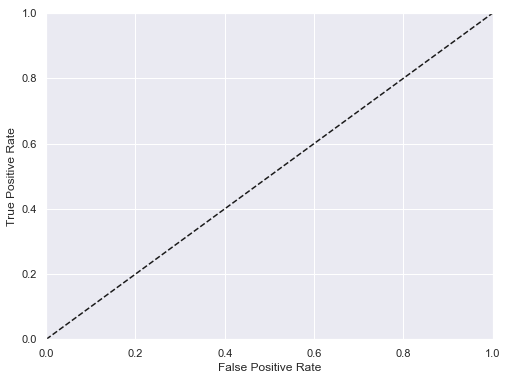

In [138]:
rndf_clf = RandomForestClassifier()
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)
#print_score(log_reg,X_train,y_train,X_test,y_test,train=False)
print('accuracy score is: ', accuracy_score(y_test,y_pred)) #accuracy score

#AUC
test_scores = cross_val_predict(rndf_clf, X_test, y_test, method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_test, test_scores[:,1])
print('auc score is: ',roc_auc_score(y_test, test_scores[:,1]))
plot_roc_curve(fpr, tpr)
plt.show()

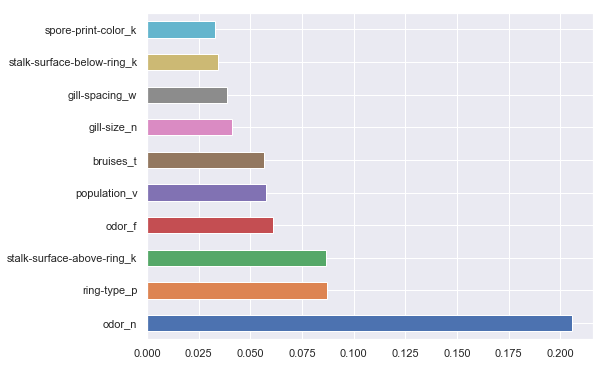

In [141]:
#feature importances
feat_importances = pd.Series(abs(rndf_clf.feature_importances_), index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Neural Network MLP classifier**

accuracy score is:  1.0
auc score is:  0.9997866630056154


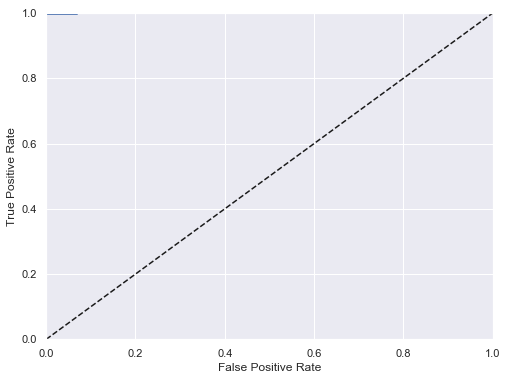

In [114]:
#MLP classifier scores using all variables

mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
#print_score(log_reg,X_train,y_train,X_test,y_test,train=False)
print('accuracy score is: ', accuracy_score(y_test,y_pred)) #accuracy score

#AUC
test_scores = cross_val_predict(mlp_clf, X_test, y_test, method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_test, test_scores[:,1])
print('auc score is: ',roc_auc_score(y_test, test_scores[:,1]))
plot_roc_curve(fpr, tpr)
plt.show()

**PCA**

In [159]:
pca = PCA(.95)
pca.fit(X_train)
pca.n_components_

38

In [160]:
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

In [161]:
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

0.9542102236063696

Test results:

Accuracy Score: 0.9906

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1303
          1       0.99      0.99      0.99      1135

avg / total       0.99      0.99      0.99      2438


Confusion Matrix:
[[1288   15]
 [   8 1127]]

accuracy score is:  0.9905660377358491
auc score is:  0.9982973889465516


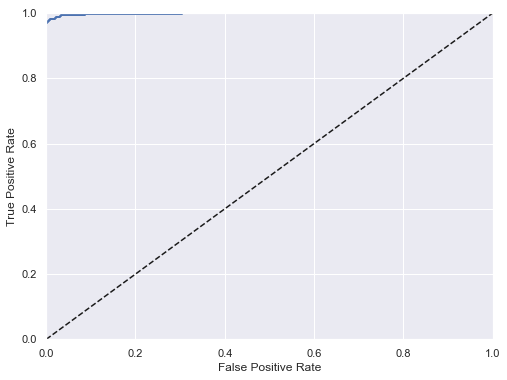

In [162]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print_score(log_reg,X_train,y_train,X_test,y_test,train=False)
print('accuracy score is: ', accuracy_score(y_test,y_pred)) #accuracy score

#AUC

test_scores = cross_val_predict(log_reg, X_test, y_test,method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_test, test_scores[:,1])
print('auc score is: ',roc_auc_score(y_test, test_scores[:,1]))


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()


accuracy score is:  1.0
auc score is:  0.9999871526568644


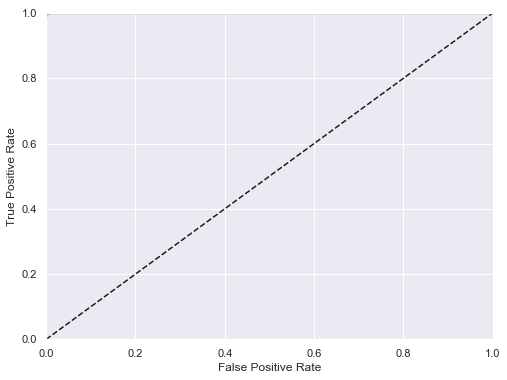

In [163]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print('accuracy score is: ', accuracy_score(y_test,y_pred)) #accuracy score


#AUC

test_scores = cross_val_predict(knn_clf, X_test, y_test,method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_test, test_scores[:,1])
print('auc score is: ',roc_auc_score(y_test, test_scores[:,1]))


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()